<div style="width:image width px; font-size:75%; text-align:right;">
    <img src="img/data_ev_unsplash.jpg" width="width" height="height" style="padding-bottom:0.2em;" />
    <figcaption>Photo by ev on Unsplash</figcaption>
</div>

# Machine learning overview with Python and scikit-learn

**Applied Programming - Summer term 2020 - FOM Hochschule für Oekonomie und Management - Cologne**

**Lecture 08/09 - May 28-29, 2020**

*At the beginning a few general comments on this notebook in the context of the lecture "Applied Programming" and with regard to the exam to be written in this module:*
* *This module is intended to present the contents relevant for the exam in the field of machine learning with scikit-learn in a compact form. This means that the exam content is not exclusively drawn from this notebook. Rather, there are also the areas CRISP-DM, GitHub, SQL as well as the topics of Python and the complementary packages pandas, NumPy and Matplotlib, which have already been discussed in previous lectures.*
* *With regard to scikit-learn, which has a much larger coverage than the one shown here, it is true that the scope of classes and methods shown here is decisive for the exam. As an example, scikit-learn implements elastic nets as an algorithm for supervised learning. They are not used in this notebook and are therefore not part of the exam. However, decision trees are discussed here, which may also be present in the exam.*
* *The algorithms are not discussed mathematically in detail, since this lecture refers to applied programming. Therefore, the goal of the lecture is to convey the basic principles of analytically oriented programming in Python. The focus is on questions like: How are machine learning algorithms implemented in general? Which typical functions are used? Which data processing steps are implemented with scikit-learn and how? Accordingly, the notebook at hand shows a number of typical implementations that students can also face in their professional environment - i.e. in the application. They should be able to quickly orient themselves on the basis of the knowledge taught here. This goal is not compatible with the time required to teach the mathematical details or specifics of the algorithms and parameters.*

## Table of contents
* [Libraries and data sets](#libraries)
* [Preprocessing](#preprocessing)
    * [Scaling](#scaling)
    * [Encoding](#encoding)
    * [Imputation](#imputation)
    * [Exercises on preprocessing](#preprocessing_exercises)
* [Unsupervised learning](#unsupervised)
    * [Principal component analysis](#pca)
    * [k-means clustering](#kmeans)
    * [Exercises on unsupervised learning](#unsupervised_exercises)
* [Supervised learning](#supervised)
    * [Train-test-split](#traintestsplit)
    * [Metrics](#metrics)
    * [Linear regression model](#linearregression)
    * [Decision trees](#decisiontrees)
    * [Random Forests](#randomforests)
    * [Neural networks with keras](#keras)
* [References](#references)

## Libraries and data sets<a class="anchor" id="libraries"></a>
First of all, we will include the general packages and modules that we will need in the following course. The specific scikit-learn modules will be integrated at the appropriate place later on.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Show visualizations in the notebook
%matplotlib inline

# Set random seed for comparability/reproducibility
np.random.seed(42)

scikit-learn comes with a set of sample data sets, which are of small [[1]](#sklearn2020a) or larger size [[2]](#sklearn2020a). These can be used for own experiments with scikit-learn. However, we will use the generator methods for data sets [[3]](#sklearn2020c). These do not generate features with meaning and names but are only numerical examples. Therefore, there is no business question to analyze. Rather, we can focus purely on programming and application of the machine learning algorithms. Generators exist for both classification and regression problems.

In [2]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression

In [37]:
# Create features and labels for classification and regression problem
X_cla, y_cla = make_classification(n_samples = 1000,      # No. of samples (rows)
                                   n_features = 5,        # No. of features (columns)
                                   n_informative = 3,     # No. of informative features
                                   n_redundant = 1,       # No. of redundant features (linear combinations)
                                   n_repeated = 1,        # No. of duplicated features
                                   n_classes = 2,         # No. of classes/labels
                                   random_state = 42)     # Random seed for comparability/reproducibility

X_reg, y_reg = make_regression(n_samples = 1000,          # No. of samples (rows)
                               n_features = 6,            # No. of features (columns)
                               n_informative = 2,         # No. of informative features
                               n_targets = 1,             # No. of regression targets, dimension of output vector
                               noise = 0.05,              # Standard dev. of noise applied to output vector
                               random_state = 42)         # Random seed for comparability/reproducibility

Now we want to visualize the data graphically and look at the classification problem by plotting the features against each other and coloring the class accordingly. For the regression problem we plot the features against the output.

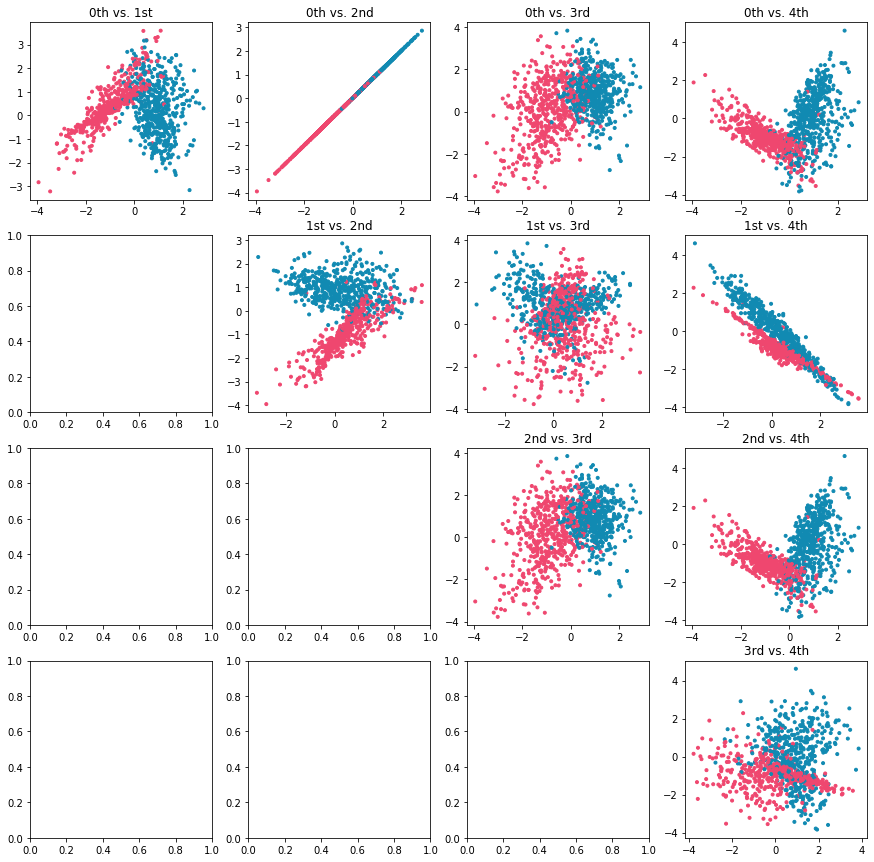

In [38]:
# Classification data set
owncmap = mc.ListedColormap(['#EF476F', '#118AB2'])
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize = (15, 15))
ax[0, 0].scatter(X_cla[:, 0], X_cla[:, 1], c = y_cla, marker = '.', cmap = owncmap)
ax[0, 0].set_title('0th vs. 1st')
ax[0, 1].scatter(X_cla[:, 0], X_cla[:, 2], c = y_cla, marker = '.', cmap = owncmap)
ax[0, 1].set_title('0th vs. 2nd')
ax[0, 2].scatter(X_cla[:, 0], X_cla[:, 3], c = y_cla, marker = '.', cmap = owncmap)
ax[0, 2].set_title('0th vs. 3rd')
ax[0, 3].scatter(X_cla[:, 0], X_cla[:, 4], c = y_cla, marker = '.', cmap = owncmap)
ax[0, 3].set_title('0th vs. 4th')
ax[1, 1].scatter(X_cla[:, 1], X_cla[:, 2], c = y_cla, marker = '.', cmap = owncmap)
ax[1, 1].set_title('1st vs. 2nd')
ax[1, 2].scatter(X_cla[:, 1], X_cla[:, 3], c = y_cla, marker = '.', cmap = owncmap)
ax[1, 2].set_title('1st vs. 3rd')
ax[1, 3].scatter(X_cla[:, 1], X_cla[:, 4], c = y_cla, marker = '.', cmap = owncmap)
ax[1, 3].set_title('1st vs. 4th')
ax[2, 2].scatter(X_cla[:, 2], X_cla[:, 3], c = y_cla, marker = '.', cmap = owncmap)
ax[2, 2].set_title('2nd vs. 3rd')
ax[2, 3].scatter(X_cla[:, 2], X_cla[:, 4], c = y_cla, marker = '.', cmap = owncmap)
ax[2, 3].set_title('2nd vs. 4th')
ax[3, 3].scatter(X_cla[:, 3], X_cla[:, 4], c = y_cla, marker = '.', cmap = owncmap)
ax[3, 3].set_title('3rd vs. 4th')
plt.draw()

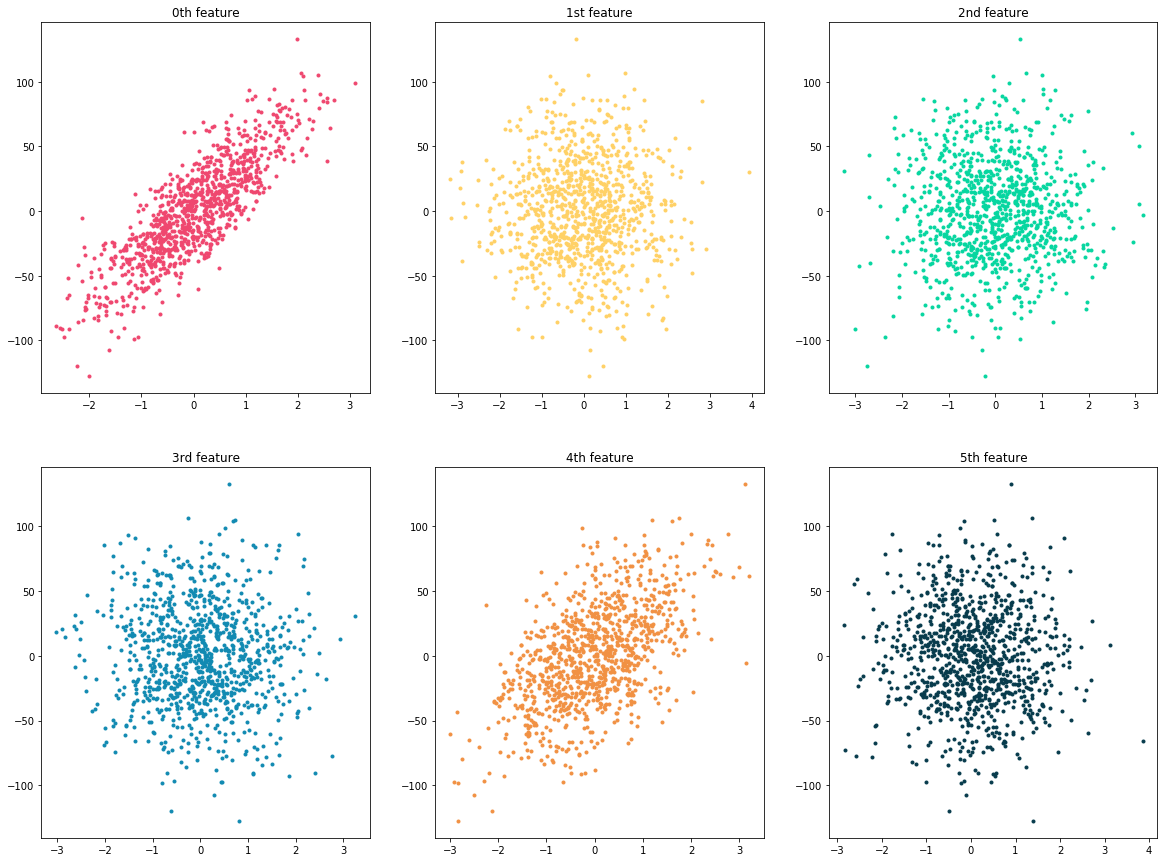

In [39]:
# Regression data set
col = ['#EF476F', '#FFD166', '#06D6A0', '#118AB2', '#F19143', '#073B4C']
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 15))
ax[0, 0].plot(X_reg[:, 0], y_reg, color = col[0], marker = '.', linestyle = 'none')
ax[0, 0].set_title('0th feature')
ax[0, 1].plot(X_reg[:, 1], y_reg, color = col[1], marker = '.', linestyle = 'none')
ax[0, 1].set_title('1st feature')
ax[0, 2].plot(X_reg[:, 2], y_reg, color = col[2], marker = '.', linestyle = 'none')
ax[0, 2].set_title('2nd feature')
ax[1, 0].plot(X_reg[:, 3], y_reg, color = col[3], marker = '.', linestyle = 'none')
ax[1, 0].set_title('3rd feature')
ax[1, 1].plot(X_reg[:, 4], y_reg, color = col[4], marker = '.', linestyle = 'none')
ax[1, 1].set_title('4th feature')
ax[1, 2].plot(X_reg[:, 5], y_reg, color = col[5], marker = '.', linestyle = 'none')
ax[1, 2].set_title('5th feature')
plt.draw()

In order to be able to consider encoding and the imputation of missing values in the further course, we make a few more changes to the data sets.

In [40]:
# Create missing values at random rows in specific columns
for i in np.random.choice(len(X_cla), 35, replace = False):
    X_cla[i, 1] = np.nan

for i in np.random.choice(len(X_reg), 25, replace = False):
    X_reg[i, 1] = np.nan
    
for i in np.random.choice(len(X_reg), 40, replace = False):
    X_reg[i, 4] = np.nan

In [41]:
# Transform one of the continuous features to a nominal feature
from sklearn import preprocessing

kbin_discrete = preprocessing.KBinsDiscretizer(n_bins = [5], encode = 'ordinal')
kbin_discrete.fit(X_cla[:, 4].reshape(-1, 1))
X_cla_nominal = kbin_discrete.transform(X_cla[:, 4].reshape(-1, 1))
X_cla[:, 4] = X_cla_nominal.reshape(1, -1)

kbin_discrete = preprocessing.KBinsDiscretizer(n_bins = [3], encode = 'ordinal')
kbin_discrete.fit(X_reg[:, 5].reshape(-1, 1))
X_reg_nominal = kbin_discrete.transform(X_reg[:, 5].reshape(-1, 1))
X_reg[:, 5] = np.add(X_reg_nominal.reshape(1, -1), 100)

In [42]:
X_cla

array([[-0.03352362,  0.48717551, -0.03352362,  1.3940345 ,  2.        ],
       [ 1.77056752,         nan,  1.77056752,  0.99627846,  3.        ],
       [ 0.3941503 ,  1.24625815,  0.3941503 ,  2.3665256 ,  0.        ],
       ...,
       [-1.06277961,  1.24861056, -1.06277961, -1.97317449,  0.        ],
       [-0.98208653,  0.18147963, -0.98208653,  0.35761105,  2.        ],
       [-0.36820117,  1.30021259, -0.36820117, -0.45685167,  0.        ]])

In [43]:
X_reg

array([[ 1.04955272e+00,  1.97599605e-01,  2.07526087e+00,
         1.31739407e+00, -5.35235212e-01,  1.00000000e+02],
       [-1.87087564e-02,  9.47526462e-01, -7.72877668e-01,
         1.12411272e+00, -3.88518453e-01,  1.01000000e+02],
       [ 6.59531470e-01,  9.31583377e-02, -5.10989170e-01,
         1.03860607e+00,             nan,  1.00000000e+02],
       ...,
       [-1.34308741e-01, -1.74853197e+00,  1.30434024e+00,
         7.93488721e-01,  8.10808273e-01,  1.00000000e+02],
       [ 7.91031947e-01, -1.40185106e+00,  5.86857094e-01,
         1.40279431e+00, -9.09387455e-01,  1.02000000e+02],
       [ 1.23958401e+00,  6.04120890e-01,  2.30363875e+00,
         1.06837933e+00,             nan,  1.00000000e+02]])

These two data sets are now intended to be used as basic data for further programming. If necessary, we will generate further data sets at a later stage without further investigation or discussion.

## Preprocessing<a class="anchor" id="preprocessing"></a>
For the modelling in the course of machine learning approaches it is necessary to preprocess the data according to the algorithms respectively estimators used. Scikit-learn offers a number of methods and functions for this purpose [[4]](#sklearn2020d).

### Scaling<a class="anchor" id="scaling"></a>
Data often falls on a certain scale. This scale can vary between attributes or measurements. In addition, machine learning algorithms do not know physical units. Moreover, attributes with a larger order of magnitude are generally weighted higher than features with a smaller order of magnitude. This problem is solved by transforming the data to unified scales, in other words scaling. In the context of data analysis, normalization and standardization are particularly relevant. Normalization means that the data is scaled to the closed interval [0, 1]. With standardization, the data is transformed to mean value zero and standard deviation one. In general it can be said that the data should be normalized or standardized if the algorithm uses a (Euclidean) distance or assumes normality.

For normalization, scikit-learn offers the class ``MinMaxScaler()``, whose default parameters are already set to the interval [0, 1]. However, this interval can also be adjusted to individual intervals such as [-1, 1]. For standardization, the class ``StandardScaler()`` transforms the data to mean value zero and variance one.

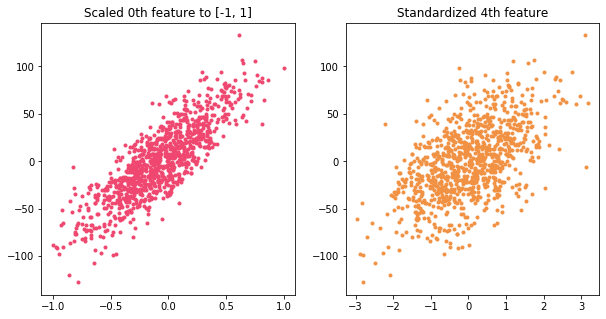

In [44]:
from sklearn import preprocessing

mm_scale = preprocessing.MinMaxScaler(feature_range = (-1, 1))       # Instantiate scaler object
X_reg_mm_scaled = mm_scale.fit_transform(X_reg[:, 0].reshape(-1, 1)) # Fit scaler to data and transform afterwards
                                                                     # The methods fit and transform are also
                                                                     # available in seperate functions
st_scale = preprocessing.StandardScaler()
X_reg_st_scaled = st_scale.fit_transform(X_reg[:, 4].reshape(-1, 1)) # Result is, however, the same, because 
                                                                     # feature was generated by gaussian process

# Visualize, observe and check x-axis
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
ax[0].plot(X_reg_mm_scaled, y_reg, color = col[0], marker = '.', linestyle = 'none')
ax[0].set_title('Scaled 0th feature to [-1, 1]')
ax[1].plot(X_reg_st_scaled, y_reg, color = col[4], marker = '.', linestyle = 'none')
ax[1].set_title('Standardized 4th feature')
plt.draw()

The scaler object can also be applied to yet unknown data in order to prepare it in the same way as the training data. For this purpose, simply apply the transform method to the unseen data ``X_new``.
```python
X_new_scaled = mmscale.transform(X_new)
```

#### Summary and key aspects
* For machine learning applications, features should be scaled so that the attributes are not preferred or disadvantaged due to their size.
* scikit-learn offers different ways of scaling with the preprocessing module.
* For normalization (scale to intervall [0, 1]) use the ``MinMaxScaler()``.
* The parameters of ``MinMaxScaler()`` can be canged to any other intervall.
* Standardization (mean value zero, variance one) can be achieved by using a ``StandardScaler()`` object.
* Scaling instances are fitted to the data with the ``fit()`` method and the data is transformed via ``transform()``
* The two steps above can be executed in combination with the ``fit_transform()`` function.
* Scaling instances can be applied to unseen data of the same origin.

### Encoding<a class="anchor" id="encoding"></a>
Not all data sets contain exclusively numerical, continuous features. Rather, categorical attributes occur very frequently. Examples are gender, place of residence or the operating system used. These non-numerical information can usually not be processed directly by machine learning algorithms. For this reason, these features have to be transformed into numerical expressions using encoding. In this context, it is of particular importance whether the categorical data has a rank/order or not. If not, such as colors or film genre, the data is referred to as nominal data. If there is a ranking, such as hierarchical ranks in an organization or version names, ordinal data exists. The different type of data also means a different type of encoding. We consider one-hot encoding for nominal data and ordinal encoding for ordinal data in the following.

In scikit-learn we can use the classes ``OneHotEncoder()`` and ``OrdinalEncoder()``. ``OneHotEncoder()`` transforms every occurring value in an attribute into a separate column. The object - i.e. the row - is then assigned 1 in the column, which corresponds to the categorical value. All other columns are set to 0. Thus we get a series of boolean columns in the number of instances of the categorical feature. With ``OrdinalEncoder()`` the values of the attribute are assigned to integers. This results in only one column with as many different integer values as there are expressions in the categorical variable.

In [45]:
oh_enc = preprocessing.OneHotEncoder(sparse = False, categories = 'auto')
# Parameter 'sparse' returns array directly if set to False
# Parameter 'categories' results in determining categories automatically based on unique values if set to auto
# which is the default

X_cla_enc = oh_enc.fit_transform(X_cla[:, 4].reshape(-1, 1))
print(X_cla_enc)

[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [46]:
or_enc = preprocessing.OrdinalEncoder(categories = 'auto')
X_reg_enc = or_enc.fit_transform(X_reg[:, 5].reshape(-1, 1))
print(X_reg_enc.flatten())                                     # flatten() is only used for compact displaying

[0. 1. 0. 0. 1. 0. 1. 1. 2. 1. 2. 2. 2. 1. 2. 2. 0. 1. 1. 1. 2. 2. 2. 1.
 2. 0. 0. 0. 1. 0. 2. 1. 1. 0. 0. 2. 2. 2. 1. 1. 1. 0. 2. 0. 0. 0. 2. 1.
 0. 1. 0. 2. 0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 2. 1. 0. 1. 1. 2. 0. 2. 2. 1.
 1. 2. 2. 1. 0. 0. 1. 0. 2. 1. 1. 2. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0.
 2. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 2. 1. 1. 2. 0. 2. 0. 1. 0. 1. 1.
 0. 0. 2. 2. 2. 1. 0. 2. 0. 1. 2. 1. 0. 1. 0. 1. 1. 2. 1. 0. 0. 0. 1. 1.
 2. 1. 2. 1. 1. 1. 1. 1. 0. 2. 0. 2. 2. 2. 2. 1. 1. 1. 2. 2. 2. 1. 0. 0.
 1. 1. 1. 1. 2. 0. 1. 2. 2. 1. 1. 2. 2. 1. 1. 2. 2. 1. 2. 0. 0. 0. 1. 0.
 2. 1. 0. 0. 2. 1. 2. 2. 1. 0. 1. 1. 1. 2. 0. 1. 2. 0. 0. 2. 1. 1. 1. 0.
 1. 0. 0. 2. 2. 1. 1. 2. 2. 1. 1. 0. 1. 1. 2. 0. 2. 0. 1. 2. 1. 0. 2. 2.
 0. 2. 0. 2. 1. 1. 2. 0. 1. 2. 2. 0. 1. 1. 2. 0. 0. 2. 1. 0. 0. 2. 1. 1.
 0. 1. 2. 2. 1. 1. 0. 2. 1. 0. 1. 0. 1. 1. 2. 0. 1. 2. 1. 2. 1. 1. 0. 1.
 0. 2. 2. 1. 0. 1. 0. 0. 1. 2. 2. 2. 0. 0. 1. 0. 0. 0. 2. 1. 1. 2. 1. 0.
 0. 1. 1. 2. 1. 2. 2. 2. 2. 2. 0. 0. 2. 2. 1. 1. 1.

#### Summary and key aspects
* Encoding enables the processing of categorical features by machine learning algorithms through transforming the attributes into numerical values.
* It must be considered whether the categorical data are nominal or ordinal.
* For nominal data, one-hot encoding can be implemented using the ``OneHotEncoder()`` class.
* For ordinal data, the ``OrdinalEncoder()`` is used - however, ordinal encoding is currently not offered, as might be expected in terms of ranking. Please refer to other packages, such as ``category-encoders`` [[5]](#mcginnis2016).

### Imputation<a class="anchor" id="imputation"></a>
A major challenge in data preprocessing is the handling of missing values. As with encoding, there are a number of possible strategies here. In each individual case, it must be evaluated and decided which strategy is the most effective choice for the case or even for the individual attribute. In this lecture we will limit ourselves to the basic imputation methods implemented in the scikit-learn class ``SimpleImputer()``.

Without going into detail here, you should know that you can also have missing values filled by an own estimator. In this case, the values are calculated as the output of a regression on the basis of the other columns. Please find below an excerpt from the documentation of scikit-learn:
> "A more sophisticated approach is to use the ``IterativeImputer`` class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output ``y`` and the other feature columns are treated as inputs ``X``. A regressor is fit on ``(X, y)`` for known ``y``. Then, the regressor is used to predict the missing values of ``y``. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned." [[6]](#sklearn2020e)

First, we look graphically at the location of missing values in the two data sets for classification and regression.

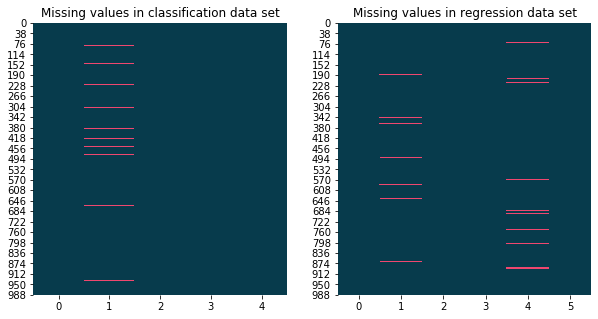

In [47]:
f,(ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
g1 = sns.heatmap(pd.DataFrame(X_cla).isnull(), cmap = ['#073B4C', '#EF476F'], cbar = False, ax = ax1)
g1.set_title('Missing values in classification data set')
g2 = sns.heatmap(pd.DataFrame(X_reg).isnull(), cmap = ['#073B4C', '#EF476F'], cbar = False, ax = ax2)
g2.set_title('Missing values in regression data set')
plt.draw()

In this way we can now compare after each imputation whether the red gaps have been closed.

We check the different imputation strategies for the ``SimpleImputer()`` class in the following short example.

In [48]:
from sklearn.impute import SimpleImputer

# Some examples to be grasped at first glance
X = np.array([[np.nan, 2, 3, 4], [10, np.nan, 10, 10], [0.1, 0.4, np.nan, 0.2], [11, 2, 10, np.nan]])
print('Array with missing values:')
print(X)
print()
print('- - - - -')
print()

simple_imputer = SimpleImputer(strategy = 'mean')
X_new = simple_imputer.fit_transform(X)
print('Imputed with means:')
print(X_new)
print()
print('- - - - -')
print()

simple_imputer = SimpleImputer(strategy = 'median')
X_new = simple_imputer.fit_transform(X)
print('Imputed with medians:')
print(X_new)
print()
print('- - - - -')
print()

simple_imputer = SimpleImputer(strategy = 'most_frequent')
X_new = simple_imputer.fit_transform(X)
print('Imputed with most frequent values:')
print(X_new)
print()
print('- - - - -')
print()

simple_imputer = SimpleImputer(strategy = 'constant', fill_value = 0, add_indicator = True)
# With add_indicator parameter, the information of where missings are imputed is not lost. It can be used for
# statistical purposes and as a new feature as well.
X_new = simple_imputer.fit_transform(X)
print('Imputed with constant value:')
print(X_new)

Array with missing values:
[[ nan  2.   3.   4. ]
 [10.   nan 10.  10. ]
 [ 0.1  0.4  nan  0.2]
 [11.   2.  10.   nan]]

- - - - -

Imputed with means:
[[ 7.03333333  2.          3.          4.        ]
 [10.          1.46666667 10.         10.        ]
 [ 0.1         0.4         7.66666667  0.2       ]
 [11.          2.         10.          4.73333333]]

- - - - -

Imputed with medians:
[[10.   2.   3.   4. ]
 [10.   2.  10.  10. ]
 [ 0.1  0.4 10.   0.2]
 [11.   2.  10.   4. ]]

- - - - -

Imputed with most frequent values:
[[ 0.1  2.   3.   4. ]
 [10.   2.  10.  10. ]
 [ 0.1  0.4 10.   0.2]
 [11.   2.  10.   0.2]]

- - - - -

Imputed with constant value:
[[ 0.   2.   3.   4.   1.   0.   0.   0. ]
 [10.   0.  10.  10.   0.   1.   0.   0. ]
 [ 0.1  0.4  0.   0.2  0.   0.   1.   0. ]
 [11.   2.  10.   0.   0.   0.   0.   1. ]]


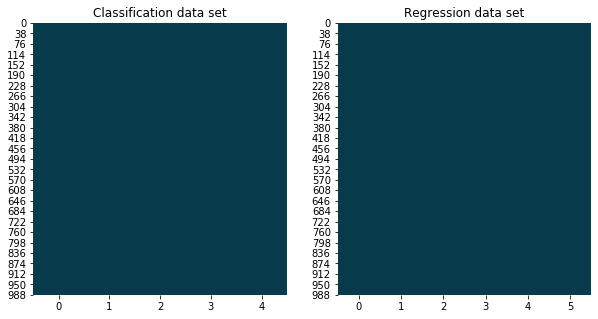

In [49]:
simple_imputer = SimpleImputer(strategy = 'mean')
X_cla_new = simple_imputer.fit_transform(X_cla)

simple_imputer = SimpleImputer(strategy = 'median')
X_reg_new = simple_imputer.fit_transform(X_reg)

f,(ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
g1 = sns.heatmap(pd.DataFrame(X_cla_new).isnull(), cmap = ['#073B4C', '#EF476F'], cbar = False, ax = ax1)
g1.set_title('Classification data set')
g2 = sns.heatmap(pd.DataFrame(X_reg_new).isnull(), cmap = ['#073B4C', '#EF476F'], cbar = False, ax = ax2)
g2.set_title('Regression data set')
plt.draw()

#### Summary and key aspects
* First, get a general overview of the information gaps in the data set. In addition to purely numerical statistics, this can also be supported graphically.
* The four fundamental imputation strategies are filling with the mean, median or most frequent value of the column as well as a constant value.
* The class provided by scikit-learn for this purpose is called ``SimpleImputer()`` and is adapted to the existing data by the function ``fit_transform()``. Afterwards the calculation of the values for the previous gaps takes place directly. ``fit()`` and ``transform()`` can also be called separately.
* For multivariate imputation, i.e. replacement based on an estimator, scikit-learn provides the ``IterativeImputer()`` class.
* One method cannot generally and always be preferred to another - in other words, there is no "best" way of imputation per se. This must be examined in each individual case.

### Exercises on preprocessing<a class="anchor" id="preprocessing_exercises"></a>

Use the following NumPy Array ``E``.

In [50]:
E = np.array([[45, np.nan, 10, 13, 0], [42, np.nan, 8, 12, 1], [44, np.nan, 7, 9, 0]])
print(E)

[[45. nan 10. 13.  0.]
 [42. nan  8. 12.  1.]
 [44. nan  7.  9.  0.]]


0. Import the ``preprocessing`` module of scikit-learn.
1. Using an instance of the ``SimpleImputer()`` class with name ``ex_imputer`` from scikit-learn, replace the missing values of E (NaN) with the constant value 42. Store the imputed array in a new variable named ``E_imputed``. Print this result.
2. In a real situation, which strategy would you choose for imputation respectively which procedure would you recommend in the present example of ``E``?
3. Create an instance of the ``OneHotEncoder()`` class from scikit-learn, set the ``sparse`` parameter to ``False`` and name the instance with ``ex_encoder``. Then use it to perform one-hot-encoding on the entire ``E_imputed`` array from task 1. Save the result in a new variable named ``E_encoded``.
4. Which dimensions (number of rows and columns) does ``E_encoded`` have? Which command can be used for this?
5. Finally, create an instance of the scikit-learn class ``MinMaxScaler()`` with name ``ex_scaler`` and set the parameters so that scaling to the interval [0, 100] is performed. Then use this instance to scale the result array of 1., ``E_imputed``, and print the result.

In [51]:
ex_imputer = SimpleImputer(strategy = 'constant', fill_value = 42)
E_imputed = ex_imputer.fit_transform(E)
print(E_imputed)

[[45. 42. 10. 13.  0.]
 [42. 42.  8. 12.  1.]
 [44. 42.  7.  9.  0.]]


In [52]:
ex_encoder = preprocessing.OneHotEncoder(sparse = False)
E_encoded = ex_encoder.fit_transform(E_imputed)
print(E_encoded)

[[0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0.]]


/home/dennis/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [53]:
E_encoded.shape

(3, 12)

In [54]:
ex_scaler = preprocessing.MinMaxScaler(feature_range = (0, 100))
E_scaled = ex_scaler.fit_transform(E_imputed)
print(E_scaled)

[[100.           0.         100.         100.           0.        ]
 [  0.           0.          33.33333333  75.         100.        ]
 [ 66.66666667   0.           0.           0.           0.        ]]


## Unsupervised learning<a class="anchor" id="unsupervised"></a>
Unsupervised learning involves the machine-based recognition of patterns in unlabelled data, i.e. without the use of a target value. The applications include particularly the dimensional reduction as well as segmentation of the data. For these purposes, two algorithms of the scikit-learn package will be presented in the following.

### Principal component analysis<a class="anchor" id="pca"></a>
The purpose of principal component analysis (PCA) is to reduce the dimensionality of a data set. Thus, large data sets with many dimensions are simplified in such a way that they can be reduced to a smaller number of meaningful orthogonal linear combinations of these dimensions. Information should not be lost or only to a small extent, whereas data correlations are summarized. From a mathematical point of view, PCA is performed according to the principal axis theorem.

The scikit-learn package implements the ``PCA()`` class in the ``decomposition`` module.

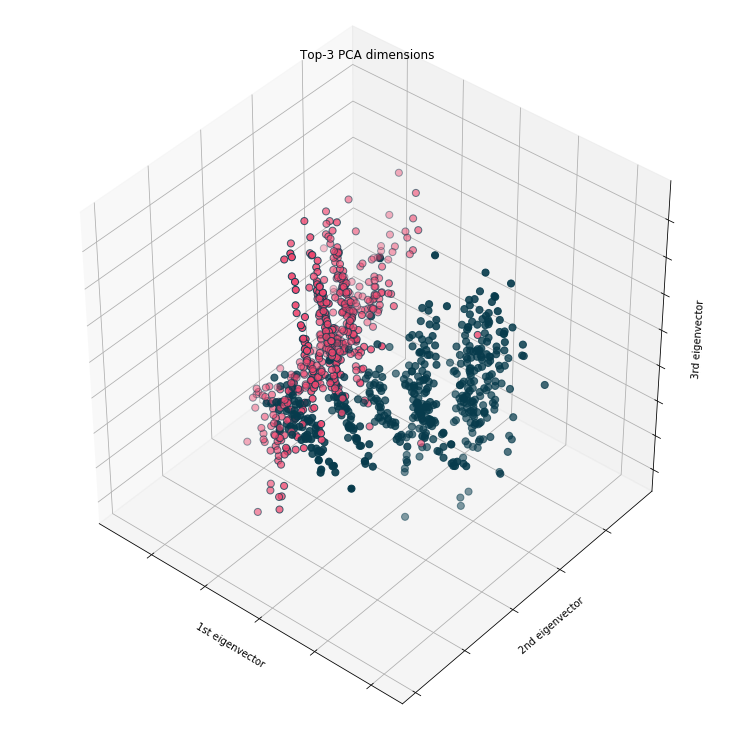

In [55]:
# PCA with three dimensions on classification data set
from sklearn.decomposition import PCA
X_pca = PCA(n_components = 3)
X_cla_pca = X_pca.fit_transform(X_cla_new)                          # take the imputed array

# Plot the result
owncmap = mc.ListedColormap(['#EF476F', '#FFD166', '#06D6A0', '#118AB2', '#F19143', '#073B4C'])
fig = plt.figure(1, figsize = (10, 10))
ax = Axes3D(fig, elev = -140, azim = 50)
ax.scatter(X_cla_pca[:, 0], X_cla_pca[:, 1], X_cla_pca[:, 2],       # first three dimensions of PCA
           c = y_cla,                                               # color-coded by label
           cmap = owncmap, edgecolor = '#073B4C', s = 50)
ax.set_title("Top-3 PCA dimensions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.draw()

Each of the orthogonal principal axes explains the variance in the data to some degree. This information can be retrieved as an attribute of the PCA instance and can be displayed as absolute or percentage values.

In [56]:
print(X_pca.explained_variance_)                                    # absolute values
print(X_pca.explained_variance_ratio_)                              # percentage values

[3.46023046 2.7494995  1.26431302]
[0.45634932 0.36261522 0.16674276]


#### Summary and key aspects
* The PCA can be regarded as an unsupervised learning procedure, since it calculates a simplified dimensional structure for data without a target value.
* PCA can therefore be used to reduce the dimension of the data.
* The instance of the class ``PCA()`` is fitted to the data with ``fit_transform()``. Using the attribute ``explained_variance_ratio_``, the percentage of variance explained can be displayed for each of the eigenvectors.

### k-means clustering<a class="anchor" id="kmeans"></a>
A cluster analysis, which can form customer segments, for instance, can be realized using the k-means algorithm. The objects in the data set are grouped in such a way that they belong to a cluster from a previously determined number of clusters. Within this cluster the objects are "similar". Mathematically, this means that the algorithm minimizes the sum of the squared deviations from the cluster centroids. An approximate algorithm is normally used for this purpose. Due to these calculations, k-means can only operate on numerical data, since a mean value cannot be calculated meaningfully for categorical data.

scikit-learn implements the class ``KMeans()`` in the module cluster. During instantiation, the number of clusters must be passed using the parameter n_clusters. The ``fit()`` function with passing the data is then used to determine the clusters/segments that can be retrieved using the ``labels_`` attribute.

In [57]:
from sklearn.cluster import KMeans
X_cla_kmeans = KMeans(n_clusters = 2, random_state = 42).fit(X_cla_new)   # take the imputed array

In [58]:
X_cla_kmeans.labels_

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,

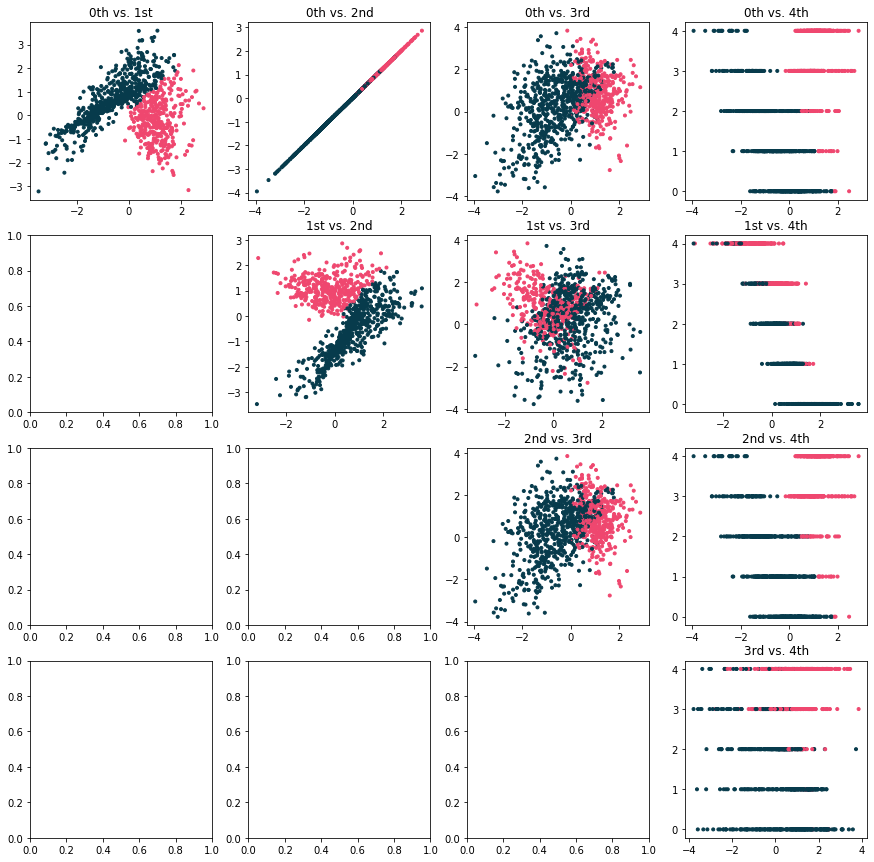

In [59]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize = (15, 15))
ax[0, 0].scatter(X_cla[:, 0], X_cla[:, 1], c = X_cla_kmeans.labels_, marker = '.', cmap = owncmap)
ax[0, 0].set_title('0th vs. 1st')
ax[0, 1].scatter(X_cla[:, 0], X_cla[:, 2], c = X_cla_kmeans.labels_, marker = '.', cmap = owncmap)
ax[0, 1].set_title('0th vs. 2nd')
ax[0, 2].scatter(X_cla[:, 0], X_cla[:, 3], c = X_cla_kmeans.labels_, marker = '.', cmap = owncmap)
ax[0, 2].set_title('0th vs. 3rd')
ax[0, 3].scatter(X_cla[:, 0], X_cla[:, 4], c = X_cla_kmeans.labels_, marker = '.', cmap = owncmap)
ax[0, 3].set_title('0th vs. 4th')
ax[1, 1].scatter(X_cla[:, 1], X_cla[:, 2], c = X_cla_kmeans.labels_, marker = '.', cmap = owncmap)
ax[1, 1].set_title('1st vs. 2nd')
ax[1, 2].scatter(X_cla[:, 1], X_cla[:, 3], c = X_cla_kmeans.labels_, marker = '.', cmap = owncmap)
ax[1, 2].set_title('1st vs. 3rd')
ax[1, 3].scatter(X_cla[:, 1], X_cla[:, 4], c = X_cla_kmeans.labels_, marker = '.', cmap = owncmap)
ax[1, 3].set_title('1st vs. 4th')
ax[2, 2].scatter(X_cla[:, 2], X_cla[:, 3], c = X_cla_kmeans.labels_, marker = '.', cmap = owncmap)
ax[2, 2].set_title('2nd vs. 3rd')
ax[2, 3].scatter(X_cla[:, 2], X_cla[:, 4], c = X_cla_kmeans.labels_, marker = '.', cmap = owncmap)
ax[2, 3].set_title('2nd vs. 4th')
ax[3, 3].scatter(X_cla[:, 3], X_cla[:, 4], c = X_cla_kmeans.labels_, marker = '.', cmap = owncmap)
ax[3, 3].set_title('3rd vs. 4th')
plt.draw()

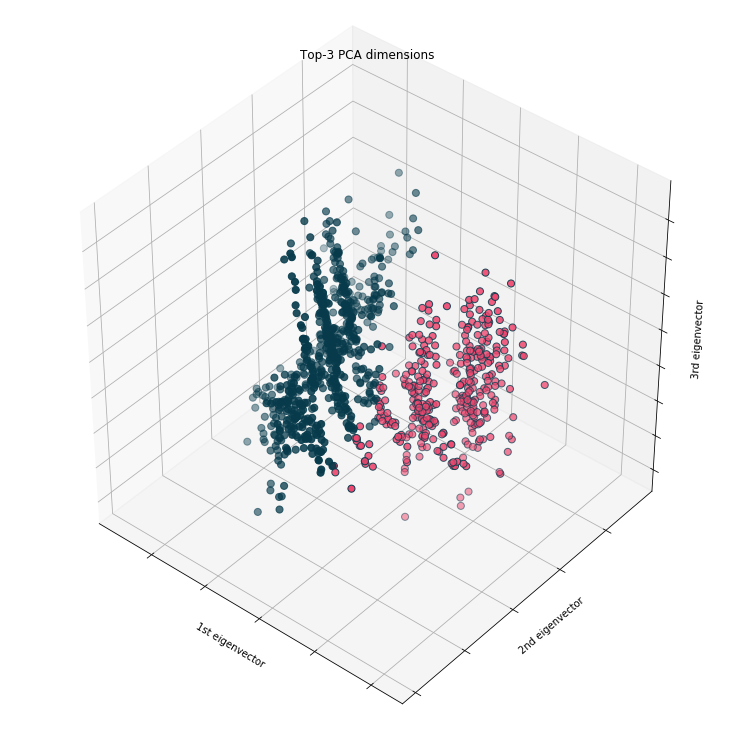

In [60]:
# Check the calculated clusters in PCA-generated eigenvector space
fig = plt.figure(1, figsize = (10, 10))
ax = Axes3D(fig, elev = -140, azim = 50)
ax.scatter(X_cla_pca[:, 0], X_cla_pca[:, 1], X_cla_pca[:, 2],
           c = X_cla_kmeans.labels_,                                # color-coded by k-means-cluster
           cmap = owncmap, edgecolor = '#073B4C', s = 50)
ax.set_title("Top-3 PCA dimensions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.draw()

#### Summary and key aspects
* k-means is a clustering algorithm, which groups objects in a cluster by minimizing the sum of the squared deviations from the cluster centroids
* k-means can only be used with numerical data.
* The scikit-learn class is called ``KMeans()`` and it is located in the ``cluster`` module
* The number of clusters has to be specified upfront
* The ``labels_`` attribute contains the information about the clusters for each object in the data set.

### Exercises on unsupervised learning<a class="anchor" id="unsupervised_exercises"></a>
0. Create a data set ``(X_ex, y_ex)`` with ``make_regression()`` consisting of 100 samples, 15 features from which 7 are informative and one regression target. Add noise in the magnitude of 0.15 and set the random seed to 7.
1. Run a principal component analysis and give the percentage of variance explained for the first five components.
2. Perform a k-means cluster analysis on X_ex. Determine the segment assignments for 3, 4, 5, and 6 clusters, setting the random seed to 77. Convert X_ex to a pandas DataFrame and join the respective cluster allocations to it.
3. Draw four histograms of segment allocations concerning ``X_ex`` with seaborn's ``distplot()`` function and check which segment has the most objects in each of the four clustering cases. Ideally, you display the four charts side by side in one plot.

In [61]:
X_ex, y_ex = make_regression(n_samples = 100,
                             n_features = 15,
                             n_informative = 7,
                             n_targets = 1,
                             noise = 0.15,
                             random_state = 7)

In [62]:
X_ex_pca = PCA(n_components = 5)
X_ex_pca.fit(X_ex)
print(X_ex_pca.explained_variance_ratio_)

[0.12027275 0.11150215 0.09849879 0.08581936 0.07662001]


In [63]:
X_ex_kmeans_3 = KMeans(n_clusters = 3, random_state = 77).fit(X_ex)
X_ex_kmeans_4 = KMeans(n_clusters = 4, random_state = 77).fit(X_ex)
X_ex_kmeans_5 = KMeans(n_clusters = 5, random_state = 77).fit(X_ex)
X_ex_kmeans_6 = KMeans(n_clusters = 6, random_state = 77).fit(X_ex)

In [64]:
X_ex = pd.DataFrame(X_ex, copy = True)
X_ex['kmeans3'] = X_ex_kmeans_3.labels_
X_ex['kmeans4'] = X_ex_kmeans_4.labels_
X_ex['kmeans5'] = X_ex_kmeans_5.labels_
X_ex['kmeans6'] = X_ex_kmeans_6.labels_
X_ex.loc[:, 'kmeans3':'kmeans6']

,kmeans3,kmeans4,kmeans5,kmeans6
0,2,3,0,3
1,1,1,1,4
2,1,1,1,4
3,1,3,4,5
4,1,1,1,4
...,...,...,...,...
95,1,0,3,1
96,0,1,1,5
97,1,1,1,5
98,2,2,4,3


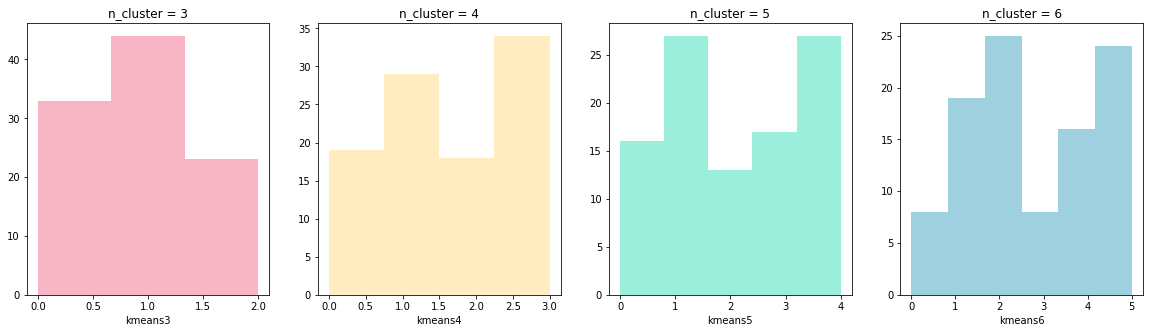

In [65]:
f,(ax1, ax2, ax3, ax4) = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))
g1 = sns.distplot(X_ex['kmeans3'], kde = False, color = '#EF476F', bins = 3, ax = ax1)
g1.set_title('n_cluster = 3')
g2 = sns.distplot(X_ex['kmeans4'], kde = False, color = '#FFD166', bins = 4, ax = ax2)
g2.set_title('n_cluster = 4')
g3 = sns.distplot(X_ex['kmeans5'], kde = False, color = '#06D6A0', bins = 5, ax = ax3)
g3.set_title('n_cluster = 5')
g4 = sns.distplot(X_ex['kmeans6'], kde = False, color = '#118AB2', bins = 6, ax = ax4)
g4.set_title('n_cluster = 6')
plt.draw()

## Supervised learning<a class="anchor" id="supervised"></a>
In supervised learning, an algorithm is parameterized so that its mapping approximates given target values as accurately as possible. In addition, however, it should also generalize properly, which means that it should provide a good prediction of the corresponding target value for previously unknown objects.

scikit-learn offers a set of estimators of supervised learning for regression and classification. Of course, we will only look at a small part of them here and discuss only the most basic parameters of the algorithms.

### Train-test-split<a class="anchor" id="traintestsplit"></a>
As described above, it is important that the final model ganerelizes well. It should therefore not map the data points during training to such an extent that they are reproduced exactly, but new data points are only estimated very poorly/inaccurately (overfitting). When describing the quality/performance of our model, we must therefore determine the quality of the mapping for new, previously unknown data. To do this, we divide the data set into a training and test data set. The test data act as a substitute for new data because they are not included in the training. When we evaluate the performance of the model, we do this on the test data set. scikit-learn offers a functionality for this with the class ``train_test_split()``.

In [66]:
from sklearn.model_selection import train_test_split

X_cla_train, X_cla_test, y_cla_train, y_cla_test = train_test_split(X_cla_new,            # take imputed array
                                                                    y_cla,
                                                                    test_size = 0.3,
                                                                    random_state = 42)

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg_new,            # take imputed array
                                                                    y_reg,
                                                                    test_size = 0.3,
                                                                    random_state = 42)

In [67]:
print(X_cla_train.shape)
print(X_cla_test.shape)

(700, 5)
(300, 5)


#### Exercises on train-test-split
1. Create two data sets, one for classification and one for regression, with scikit-learn's generators known from above. Use parameters of your choice, but set a random seed!
2. Run a train-test-split with parameters of your choice, but set a random seed too.

In [68]:
X_cla2, y_cla2 = make_classification(n_samples = 50000,
                                   n_features = 15,
                                   n_informative = 4,
                                   n_redundant = 5,
                                   n_repeated = 3,
                                   n_classes = 5,
                                   random_state = 11)

X_reg2, y_reg2 = make_regression(n_samples = 120,
                               n_features = 50,
                               n_informative = 20,
                               n_targets = 3,
                               noise = 2.5,
                               random_state = 11)

In [69]:
X_cla2_train, X_cla2_test, y_cla2_train, y_cla2_test = train_test_split(X_cla2,
                                                                        y_cla2,
                                                                        test_size = 0.25,
                                                                        random_state = 11)

X_reg2_train, X_reg2_test, y_reg2_train, y_reg2_test = train_test_split(X_reg2,
                                                                        y_reg2,
                                                                        test_size = 0.25,
                                                                        random_state = 11)

### Metrics<a class="anchor" id="metrics"></a>
To determine the performance of an estimator there are a number of metrics. For the measures available in scikit-learn alone, see [[7]](#sklearn2020f). We will focus here on two metrics: Accuracy for classification problems and the mean squared error for regression methods. We will go into the details for the respective models using the examples.

In [70]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

### Linear regression model<a class="anchor" id="linearregression"></a>
Linear regression is a linear mapping of dependent variables to one or more independent variables. In these models, the parameters of the general linear equation (in matrix notation)
$$\textbf{y} = \textbf{MX} + \textbf{b}$$
are optimized to minimize the deviation/error.

We would like to introduce the most basic linear regressor from scikit-learn here, ``LinearRegression()``, which fits the parameters via ``fit()`` with the arrays ``X`` and ``y`` as parameters. The coefficients can be accessed by the ``coef_`` attribute and the intercept by ``intercept_``.

In [71]:
from sklearn import linear_model

lr_reg = linear_model.LinearRegression()
lr_reg.fit(X_reg_train[:, np.newaxis, 0], y_reg_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
print(lr_reg.coef_)
print(lr_reg.intercept_)

[33.69442774]
-0.9606664515087666


In [76]:
y_reg_pred = lr_reg.predict(X_reg_test[:, np.newaxis, 0])

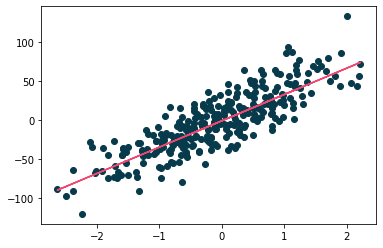

In [77]:
plt.scatter(X_reg_test[:, np.newaxis, 0], y_reg_test, color = '#073B4C')
plt.plot(X_reg_test[:, np.newaxis, 0], y_reg_pred, color = '#EF476F')
plt.draw()

In [78]:
mean_squared_error(y_reg_test, y_reg_pred)

446.1972504930553

#### Exercises on linear regression
1. Take your just generated regression data set and build a regression model for one(!) attribute.
2. Evaluate your model.

In [79]:
ex_lr = linear_model.LinearRegression()
ex_lr.fit(X_reg2_train[:, np.newaxis, 0], y_reg2_train)
y_reg2_pred = ex_lr.predict(X_reg2_test[:, np.newaxis, 0])
mean_squared_error(y_reg2_test, y_reg2_pred)

46808.97058091623

### Decision trees<a class="anchor" id="decisiontrees"></a>
Decision trees are directed, acyclic graphs where the nodes represent a decision between different instances of an attribute. The edges following this node are the respective decision for one of the possibilities. The nodes of the next layer following the edges finally represent the classification respectively the decision made. This is how the decision tree divides the state space of the problem into small subsets. Each level of the decision tree
allows the state space to be further fragmented. [[8]](#gluesenkamp2018)

scikit-learn offers in its ``tree`` module decision tree implementations for both regression and classification problems: ``DecisionTreeClassifier()`` and ``DecisionTreeRegressor()``.

In [80]:
from sklearn import tree

#### Classification with decision trees

In [81]:
dt_clf = tree.DecisionTreeClassifier(random_state = 42)
dt_clf.fit(X_cla_train, y_cla_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

[Text(146.07259615384615, 208.38, 'X[0] <= 0.083\ngini = 0.5\nsamples = 700\nvalue = [351, 349]'),
 Text(59.55576923076923, 190.26, 'X[2] <= -0.198\ngini = 0.133\nsamples = 335\nvalue = [311, 24]'),
 Text(38.63076923076923, 172.14, 'X[3] <= 3.41\ngini = 0.048\nsamples = 284\nvalue = [277, 7]'),
 Text(32.19230769230769, 154.01999999999998, 'X[1] <= 2.403\ngini = 0.042\nsamples = 283\nvalue = [277, 6]'),
 Text(25.753846153846155, 135.89999999999998, 'X[1] <= 1.537\ngini = 0.035\nsamples = 282\nvalue = [277, 5]'),
 Text(12.876923076923077, 117.77999999999999, 'X[2] <= -0.795\ngini = 0.022\nsamples = 271\nvalue = [268, 3]'),
 Text(6.438461538461539, 99.66, 'gini = 0.0\nsamples = 192\nvalue = [192, 0]'),
 Text(19.315384615384616, 99.66, 'X[2] <= -0.791\ngini = 0.073\nsamples = 79\nvalue = [76, 3]'),
 Text(12.876923076923077, 81.53999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(25.753846153846155, 81.53999999999999, 'X[4] <= 2.5\ngini = 0.05\nsamples = 78\nvalue = [76, 2]'),


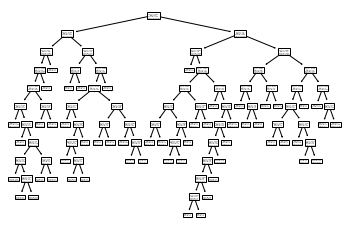

In [82]:
tree.plot_tree(dt_clf)

In [83]:
y_cla_pred = dt_clf.predict(X_cla_test)

In [84]:
print('Accuracy:')
print(accuracy_score(y_cla_test, y_cla_pred))
print()
print('Null accuracy:')
print(y_cla_test.sum()/len(y_cla_test))

Accuracy:
0.91

Null accuracy:
0.49333333333333335


In [85]:
confusion_matrix(y_cla_test, y_cla_pred)

array([[142,  10],
       [ 17, 131]])

The accuracy $a$ is calculated from the different areas of the Confusion Matrix
$$a = \frac{TP + TN}{TP + FN + FP + TN}$$
where
* True positive (TP): The true target value is positive and the prediction also gives a positive result
* False negative (FN): The true target value is positive, but the prediction gives a negative result
* False positive (FP): The true target value is negative, but the prediction gives a positive result
* True negative (TN): The true target value is negative and the prediction also gives a negative result

#### Regression with decision trees

In [86]:
dt_reg = tree.DecisionTreeRegressor(random_state = 42)
dt_reg.fit(X_reg_train, y_reg_train)
y_reg_pred = dt_reg.predict(X_reg_test)

[Text(163.21959109845793, 211.04470588235293, 'X[0] <= 0.011\nmse = 1506.769\nsamples = 700\nvalue = 1.262'),
 Text(73.99661117822626, 198.25411764705882, 'X[0] <= -0.783\nmse = 800.377\nsamples = 337\nvalue = -25.367'),
 Text(32.238061398521886, 185.4635294117647, 'X[4] <= 0.023\nmse = 637.655\nsamples = 121\nvalue = -47.994'),
 Text(15.137613700966458, 172.6729411764706, 'X[0] <= -1.05\nmse = 399.509\nsamples = 63\nvalue = -65.225'),
 Text(4.86544911881751, 159.88235294117646, 'X[4] <= -1.841\nmse = 265.874\nsamples = 41\nvalue = -75.608'),
 Text(0.7613416714042069, 147.09176470588235, 'X[0] <= -1.821\nmse = 134.757\nsamples = 6\nvalue = -103.627'),
 Text(0.38067083570210347, 134.30117647058825, 'mse = 0.0\nsamples = 1\nvalue = -127.653'),
 Text(1.1420125071063105, 134.30117647058825, 'X[0] <= -1.606\nmse = 23.17\nsamples = 5\nvalue = -98.822'),
 Text(0.7613416714042069, 121.51058823529411, 'mse = 0.0\nsamples = 1\nvalue = -107.636'),
 Text(1.5226833428084139, 121.51058823529411, 'X[

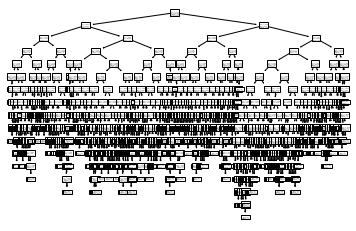

In [87]:
tree.plot_tree(dt_reg)

In [88]:
mean_squared_error(y_reg_test, y_reg_pred)

100.829651842397

#### Exercises on decision trees
1. Take your regression and classification data sets and build decision tree models for both.
2. Adjust the parameters ``criterion`` and ``max_depth`` for the estimator. Can you achieve better performances?
3. Evaluate your models and compare the regression estimator with the linear model.

### Random forests<a class="anchor" id="randomforests"></a>
A single decision tree can have a high variance and error rate because of its large number of decision nodes and layers. This is due to the uncertainty that each node entails. To improve the predictive power an ensemble of decision trees, called random forest, was proposed.

As with the decision trees, scikit-learn offers the possibility to use random forests for both classification and regression.

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

#### Classification with random forests

In [90]:
rf_clf = RandomForestClassifier(random_state = 42)
rf_clf.fit(X_cla_train, y_cla_train)

/home/dennis/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [91]:
y_cla_pred = rf_clf.predict(X_cla_test)
print('Accuracy:')
print(accuracy_score(y_cla_test, y_cla_pred))
print()
print('Null accuracy:')
print(y_cla_test.sum()/len(y_cla_test))

Accuracy:
0.9233333333333333

Null accuracy:
0.49333333333333335


In [92]:
confusion_matrix(y_cla_test, y_cla_pred)

array([[141,  11],
       [ 12, 136]])

#### Regression with random forests

In [93]:
rf_reg = RandomForestRegressor(random_state = 42)
rf_reg.fit(X_reg_train, y_reg_train)
y_reg_pred = rf_reg.predict(X_reg_test)
mean_squared_error(y_reg_test, y_reg_pred)

/home/dennis/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


37.97521088176905

#### Exercises on random forests
1. Take your regression and classification data sets and build random forest models for both.
2. Adjust the parameters ``criterion``, ``max_depth``, and ``n_estimators`` for the estimator. Can you achieve better performances?
2. Evaluate your models and compare the estimators with your previous results.

### Neural networks with keras<a class="anchor" id="keras"></a>
At this point only a small outlook on the work with the package keras for the implementation of neural networks is given.

In [94]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/home/dennis/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dennis/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dennis/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dennis/anaconda3/lib/python3.7/site-packages/tenso

In [95]:
model = Sequential()
model.add(Dense(12, input_dim = 5, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [96]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [97]:
model.fit(X_cla_train, y_cla_train, epochs = 150, batch_size = 10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/150
700/700 [==============================] - 0s 359us/step - loss: 0.5574 - accuracy: 0.8629
Epoch 2/150
700/700 [==============================] - 0s 142us/step - loss: 0.4464 - accuracy: 0.8829
Epoch 3/150
700/700 [==============================] - 0s 141us/step - loss: 0.3517 - accuracy: 0.9057
Epoch 4/150
700/700 [==============================] - 0s 147us/step - loss: 0.2766 - accuracy: 0.9100
Epoch 5/150
700/700 [==============================] - 0s 145us/step - loss: 0.2306 - accuracy: 0.9243
Epoch 6/150
700/700 [==============================] - 0s 151us/step - loss: 0.2047 - accuracy: 0.9229
Epoch 7/150
700/700 [==============================] - 0s 137us/step - loss: 0.1915 - accuracy: 0.9300
Epoch 8/150
700/700 [==============================] - 0s 150us/step - loss: 0.1818 - accuracy: 0.9286
Epoch 9/150
700/700 [==============================] - 0s 140us/step - loss: 0.1749 - accuracy: 0.9357
Epoch 10/150
700/700 [===

700/700 [==============================] - 0s 127us/step - loss: 0.1110 - accuracy: 0.9629
Epoch 78/150
700/700 [==============================] - 0s 145us/step - loss: 0.1111 - accuracy: 0.9629
Epoch 79/150
700/700 [==============================] - 0s 132us/step - loss: 0.1100 - accuracy: 0.9657
Epoch 80/150
700/700 [==============================] - 0s 148us/step - loss: 0.1109 - accuracy: 0.9586
Epoch 81/150
700/700 [==============================] - 0s 132us/step - loss: 0.1121 - accuracy: 0.9629
Epoch 82/150
700/700 [==============================] - 0s 142us/step - loss: 0.1101 - accuracy: 0.9629
Epoch 83/150
700/700 [==============================] - 0s 144us/step - loss: 0.1103 - accuracy: 0.9614
Epoch 84/150
700/700 [==============================] - 0s 128us/step - loss: 0.1100 - accuracy: 0.9657
Epoch 85/150
700/700 [==============================] - 0s 152us/step - loss: 0.1099 - accuracy: 0.9629
Epoch 86/150
700/700 [==============================] - 0s 136us/step - loss:

In [98]:
model.evaluate(X_cla_test, y_cla_test)

300/300 [==============================] - 0s 90us/step


[0.13884195804595947, 0.9666666388511658]

## References<a class="anchor" id="references"></a>

[1]<a class="anchor" id="sklearn2020a"></a> The scikit-learn developers (2020). Toy datasets. Retrieved 2020-05-18 from https://scikit-learn.org/stable/datasets/index.html#toy-datasets

[2]<a class="anchor" id="sklearn2020b"></a> The scikit-learn developers (2020). Real world datasets. Retrieved 2020-05-18 from https://scikit-learn.org/stable/datasets/index.html#real-world-datasets

[3]<a class="anchor" id="sklearn2020c"></a> The scikit-learn developers (2020). Generated datasets. Retrieved 2020-05-18 from https://scikit-learn.org/stable/datasets/index.html#generated-datasets

[4]<a class="anchor" id="sklearn2020d"></a> The scikit-learn developers (2020). Preprocessing data. Retrieved 2020-05-18 from https://scikit-learn.org/stable/modules/preprocessing.html#

[5]<a class="anchor" id="mcginnis2016"></a> Will McGinnis (2016). Category Encoders. Retrieved 2020-05-18 from http://contrib.scikit-learn.org/category_encoders/

[6]<a class="anchor" id="sklearn2020e"></a> The scikit-learn developers (2020). Multivariate feature imputation. Retrieved 2020-05-18 from https://scikit-learn.org/stable/modules/impute.html#multivariate-feature-imputation

[7]<a class="anchor" id="sklearn2020f"></a> The scikit-learn developers (2020). Common cases: predefined values. Retrieved 2020-05-18 from https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values

[8]<a class="anchor" id="gluesenkamp2018"></a> Gluesenkamp, D. (2018). Prediction of customer churn with premium online calculation data in insurance business. *Master thesis*. DeMontfort University, Leicester.